<center><img src ="https://kubrick.htvapps.com/htv-prod-media.s3.amazonaws.com/images/nhjxygyi-1559831904.jpg?crop=1.00xw:1.00xh;0,0&resize=900:*"></center>
<h1><center>  <div style="background-color:lightgreen;border-radius:10px; padding: 10px;">1. Introduction</div></center></h1>

🌨 Motivation
> Tôi đã nghe tin tức dự báo mưa từ khi còn nhỏ và 99% thời gian, chúng đều không chính xác 😅! Tôi từng nghĩ, làm sao những người dự báo mưa có thể sai nhiều lần đến vậy, liệu việc dự báo mưa có khó như vậy không. Điều này đã thúc đẩy tôi để tham gia vào thử thách dự báo mưa bằng chính mình và xem liệu tôi có thể làm tốt hơn họ không.

🎯 Goal
> Mục tiêu của sổ tay này là dự báo mưa vào ngày mai bằng cách sử dụng kỹ năng khoa học dữ liệu và máy học với độ chính xác cao.

🤖 Artificial Neural Netwok
> Tôi sẽ dự báo mưa bằng mô hình FNN Feedforward Neural Network (Mạng nơ-ron truyền thẳng). Bạn có thể sử dụng các thuật toán phân loại khác, nhưng tôi muốn giải quyết vấn đề này với các thuật toán phức tạp nhất mà chúng ta có và một trong số đó là ANN. Trọng tâm của tôi là đạt được độ chính xác cao và không phải là giải thích mô hình hoặc tìm ra sự quan trọng của các đặc điểm, đây là lý do khác để chọn ANN. Vậy, bắt đầu thôi!

<h1><center>  <div style="background-color:lightgreen;border-radius:10px; padding: 10px;">2. Import and Cleaning the Data 🧹</div></center></h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df = pd.read_csv('./data/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

> Kiểu dữ liệu của cột `Date` tháng hiện tại là object nên tôi sẽ chuyển đổi nó sang kiểu datetime để dễ dàng xử lý các ngày tháng.

In [4]:
# Changing the data types of Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

> Bây giờ chúng ta sẽ phân tích biến mục tiêu là `RainTomorrow`. Tôi sẽ kiểm tra các giá trị thiếu và sự mất cân bằng giữa các lớp.

In [5]:
# Checking for the missing values in the target variable
df['RainTomorrow'].isnull().sum()

3267

> `RainTomorrow` has 3267 missing values. As `RainTomorrow` is to be predicted so we can't impute for missing values. Thus, we have to drop the the rows with missing values.

In [6]:
# Droping the missing values
df = df.dropna(subset = ['RainTomorrow'])

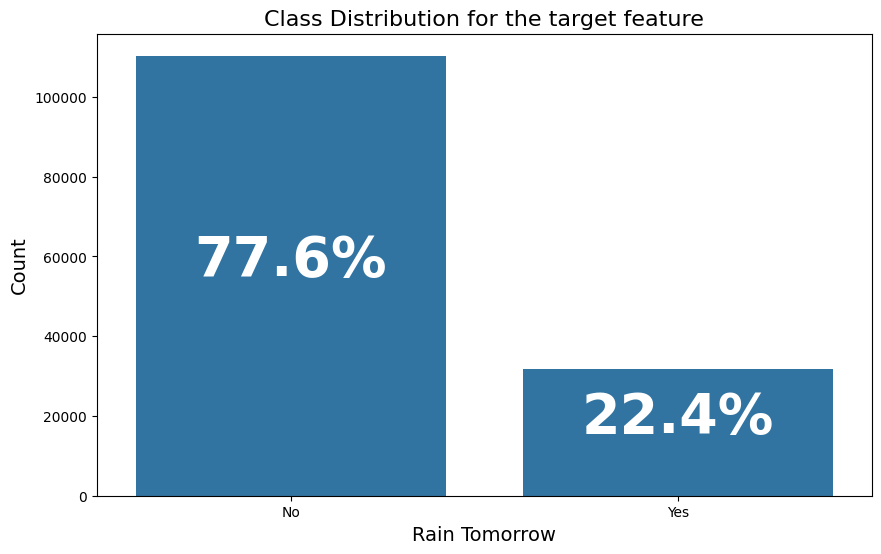

In [7]:
# Checking for the class imbalance
fig = plt.figure(figsize = (10, 6))
axis = sns.countplot(x = 'RainTomorrow', data = df);
axis.set_title('Class Distribution for the target feature', size = 16);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(df)*100, 1)}%", 
            ha = 'center', size = 40, rotation = 0, weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Rain Tomorrow', size = 14)
axis.set_ylabel('Count', size = 14);

> The class is imbalance when the minority class has only 5-10% data. We have 22.4% data belonging to the minority class, so, there is no class imbalance. Now, let's look at other features.

> I will be creating new features of `day` and `month` from `Date` column, which are cyclic in nature. If I do not do any preprocessing on them and directly feed them to ANN, the ANN can give more or less importance based on the values. Eg. days will have values from 1 to 31, so ANN thinks that value 31 is more than 1, but actually they are just days so our model can go wrong. Thus, I will be performing a transformation on these features to make them cyclic.

<center><img src = "https://www.math.hkust.edu.hk/~machiang/1013/Notes/sine_2.gif"></center>

> A circle is the projection of cyclic pattern. This concept is used here, to make feature transformations.

<h3><center>  <div style="background-color:lightgreen;border-radius:10px; padding: 10px;">Feature Engineering 📐📏</div></center></h3>

In [8]:
# months and days in a cyclic continuous feature.

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

df['month'] = df['Date'].dt.month
df = encode(df, 'month', 12)

df['day'] = df['Date'].dt.day
df = encode(df, 'day', 31)

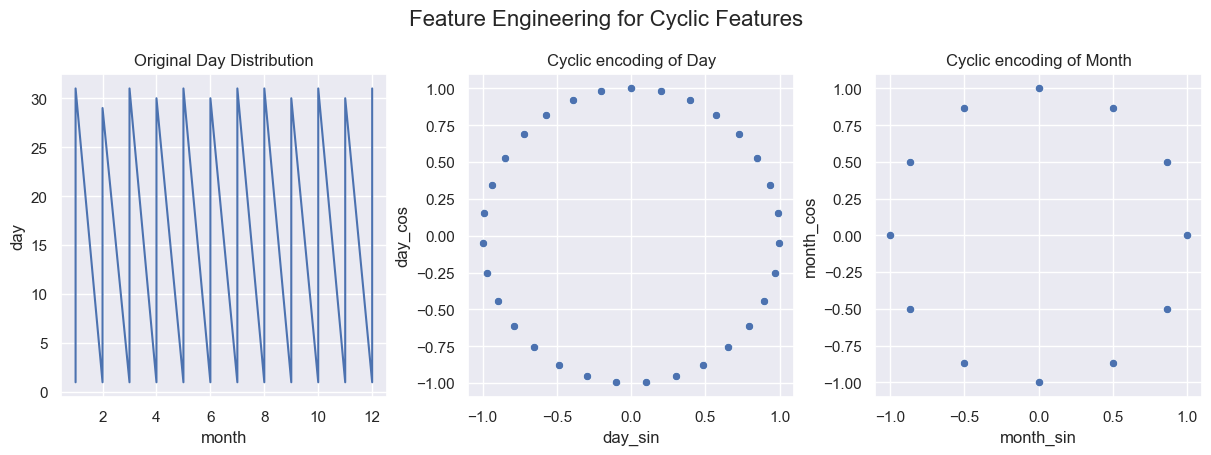

In [9]:
# Let's look at the transformed features

sns.set()  # Đặt thiết lập mặc định của Seaborn
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12, 4), constrained_layout = True)

ax1 = sns.lineplot(x = 'month', y = 'day', data = df, estimator = None, ax=ax1)
ax2 = sns.scatterplot(x = 'day_sin', y = 'day_cos', data = df, ax = ax2)
ax3 = sns.scatterplot(x = 'month_sin', y = 'month_cos', data = df, ax = ax3)

ax1.set_title('Original Day Distribution')
ax2.set_title('Cyclic encoding of Day')
ax3.set_title('Cyclic encoding of Month')

fig.suptitle('Feature Engineering for Cyclic Features', size = 16, y = 1.1);

> Before doing any preprocessing, I will split the data into train and test set. The reason for that is, we don't see the test data, so all the preprocessing should be based on the train data. If we perform the preprocessing based on test data, it means that we did some cheating 😛 as we looked at the test data.

> I am splitting the data into train and test with ratio of 80% - 20% (randomly chosen), and chossing `stratify` which will keep the proportion of target variable equal in both train and test data.  

In [10]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.8, random_state  = 99, stratify = df['RainTomorrow'])

<h3><center>  <div style="background-color:lightgreen;border-radius:10px; padding: 10px;">Cleaning Categorical Features 🚿</div></center></h3>

In [11]:
# Let's first handle missing values for catergorical data
categorical_col = df_train.select_dtypes('object').columns[:-1].to_list()
df_train[categorical_col].isnull().mean()*100

Location       0.000000
WindGustDir    6.515815
WindDir9am     6.982612
WindDir3pm     2.632874
RainToday      0.988976
dtype: float64

> As the missing values are less than 10%, I will impute them with the mode.

In [12]:
# Imputing with the mode
for col in categorical_col:
    df_train[col].fillna(df_train[col].mode()[0], inplace = True)
    df_test[col].fillna(df_train[col].mode()[0], inplace = True) # Imputing test data using train data

<h3><center>  <div style="background-color:lightgreen;border-radius:10px; padding: 10px;">Cleaning Numeric Features 🚿</div></center></h3>

> The data cleaning of numeric features involves following things:
> - Handling missing values
> - Removing multicollinearity
> - Removing outliers

> Let's do them one by one

<h4><center>  <div style="background-color:skyblue;border-radius:10px; padding: 10px;">Handling Missing Values</div></center></h4>

> Missing data present various problems. First, the absence of data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false. Second, the lost data can cause bias in the estimation of parameters. Third, it can reduce the representativeness of the samples.

In [13]:
# Missing values for numeric data
numeric_col = df.describe().columns.to_list()
df_train[numeric_col].isnull().mean()*100

Date              0.000000
MinTemp           0.443061
MaxTemp           0.215377
Rainfall          0.988976
Evaporation      42.788825
Sunshine         47.626457
WindGustSpeed     6.474498
WindSpeed9am      0.941505
WindSpeed3pm      1.826749
Humidity9am       1.266769
Humidity3pm       2.530900
Pressure9am       9.853719
Pressure3pm       9.830863
Cloud9am         37.734058
Cloud3pm         40.174411
Temp9am           0.638219
Temp3pm           1.910262
month             0.000000
month_sin         0.000000
month_cos         0.000000
day               0.000000
day_sin           0.000000
day_cos           0.000000
dtype: float64

> `Evaporation`, `Sunshine`, `Cloud9am` and `Cloud3pm` have large missing values, so we will first look at these features and then handle the missing values for remaing numeric features.

In [14]:
# # Let's explore the features having high missing values
# cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

# plt.style.use('seaborn-dark')
# fig, ax = plt.subplots(4,2, figsize = (12, 8), constrained_layout = True)

# for i, num_var in enumerate(cols): 
#     sns.kdeplot(data = df_train, x = num_var, ax = ax[i][0],
#                 fill = True, alpha = 0.6, linewidth = 1.5)
#     ax[i][0].set_ylabel(num_var)
#     ax[i][0].set_xlabel(None)
    
#     sns.histplot(data = df_train, x = num_var, ax = ax[i][1])
#     ax[i][1].set_ylabel(None)
#     ax[i][1].set_xlabel(None)
    
# fig.suptitle('Features having high missing values (>35%)', size = 16)

> Except `Evaporation`, all other three have distributed data, so we will impute the missing values with the median, and impute missing values for`Evaporation` with mean.

In [15]:
# Droping the columns with high missing values (>35%) and distributed data
# for dataframe in [df_train, df_test]:
#     dataframe.drop(columns = ['Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1, inplace = True)

for dataframe in [df_train, df_test]:
    for cols in ['Sunshine', 'Cloud9am', 'Cloud3pm']:
        dataframe[cols].fillna(df_train[cols].median(), inplace = True)

    dataframe['Evaporation'].fillna(df_train['Evaporation'].mean(), inplace = True)

> Now I will remove the missing values from the remaining numerical features as they are <10%. One can also impute them with mean/ median whichever is appropriate.

In [16]:
# Removing the missing values from the remaining numerical features as they are <10%.
# numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
#                'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# for dataframe in [df_train, df_test]:
#     for col in numeric_col:
#         # Imputing missing values with median based on train set
#         dataframe[col].fillna(df_train[col].median(), inplace = True)

df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

<h4><center>  <div style="background-color:skyblue;border-radius:10px; padding: 10px;">Removing multicollinearity 🧑👦</div></center></h4>

> Multicollinearity is a problem because it undermines the statistical significance of an independent variable. Other things being equal, the larger the standard error of a regression coefficient, the less likely it is that this coefficient will be statistically significant. Also it affects storage and speed.

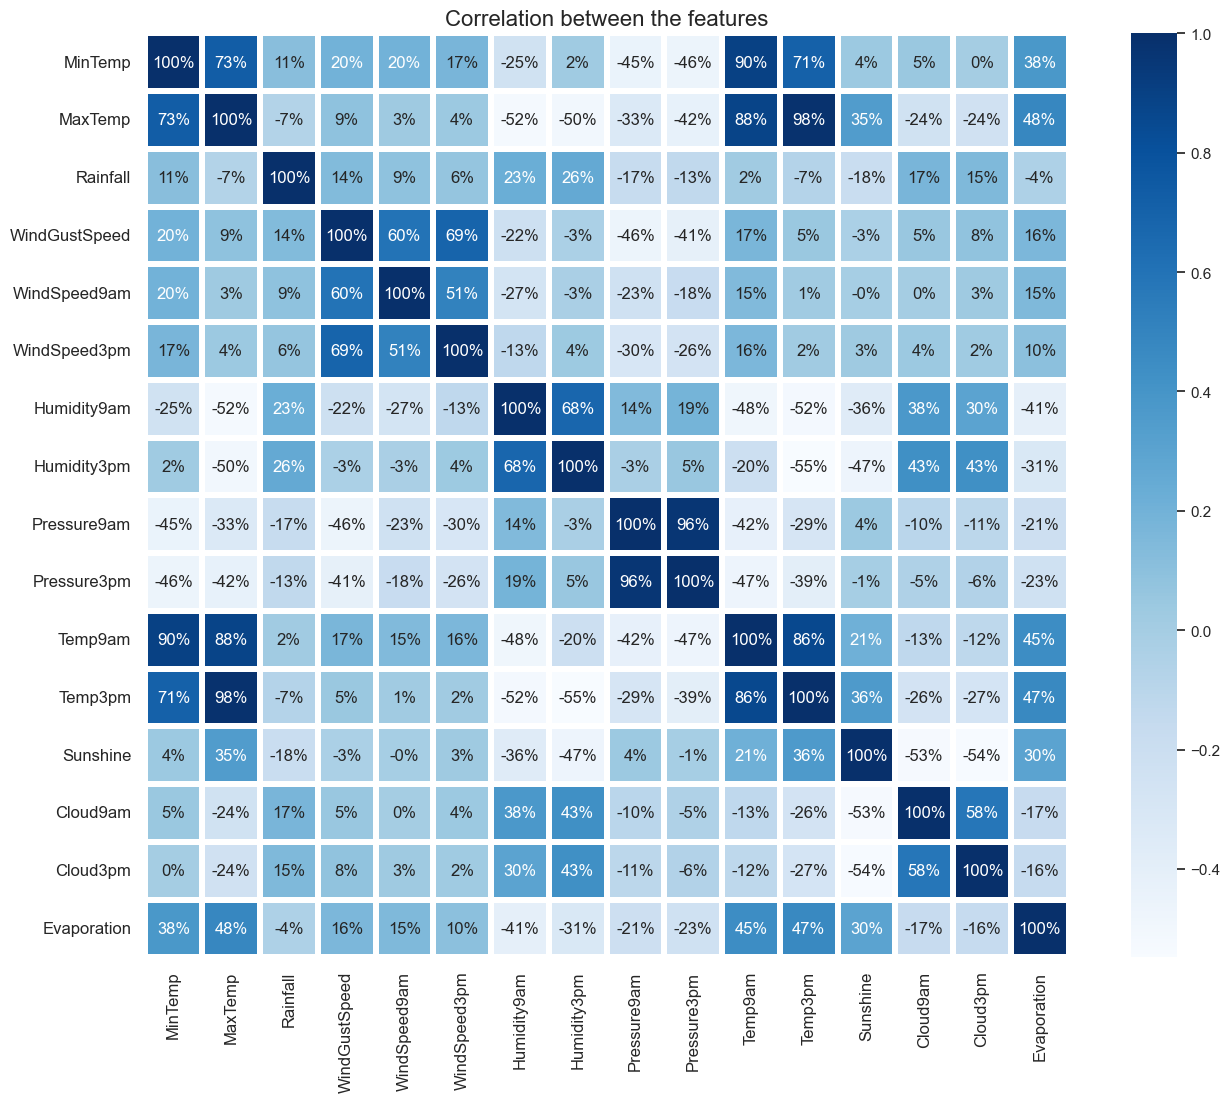

In [17]:
# Checking for the correlation between the numeric features
# Correlation between numeric variables

numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
              'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']

fig=plt.figure(figsize=(16,12))
axis=sns.heatmap(df_train[numeric_col].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16);
axis.set_xticklabels(numeric_col, fontsize=12)
axis.set_yticklabels(numeric_col, fontsize=12, rotation=0);

> #### Strong correlation between

`Temp3pm` and `MaxTemp`

`Pressure3pm` and `Pressure9am`

`Temp9am` and `MinTemp`

`Temp9am` and `MaxTemp`

`Temp3pm` and `Temp9am`

> We will remove one of the features in each pair, to avoid multicollinearity

In [18]:
# Droping the columns
for dataframe in [df_train, df_test]:
    dataframe.drop(['Temp3pm', 'Pressure3pm', 'Temp9am'], axis = 1, inplace = True)

<h4><center>  <div style="background-color:skyblue;border-radius:10px; padding: 10px;">Removing Outliers 👚👚👚👚🩱👚</div></center></h4>

In [19]:
# Let's look at the outliers and the distribution of the numeric features

numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']

plt.style.use('seaborn')
fig, axis = plt.subplots(13, 2, figsize = (12, 24))
for i, num_var in enumerate(numeric_col):
    
    # Checking for the outliers using boxplot
    sns.boxplot(y = num_var, data = df_train, ax = axis[i][0], color = 'skyblue')
    
    # Checking for the distribution using kdeplot
    sns.kdeplot(x = num_var, data = df_train, ax = axis[i][1], color = 'skyblue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

> Many numeric features have data points beyond IQR. I am considering a threshold of 5 percentile, for outlier removal, i.e any point beyound 95 percentile and below 5 percentile is considerd as outlier and will be removed.

> The threshold of 5 percentile is choosen at random, you can very well consider other values for the threshold also.

In [ ]:
threshold = 0.05
for col in numeric_col:
    
    # Lower and upper threshold
    lower_threshold = df_train[col].quantile(threshold)
    upper_threshold = df_train[col].quantile(1-threshold)
    
    # Dropping the values below lower threshold and beyond upper threshold
    df_train = df_train[(df_train[col]>=lower_threshold) & (df_train[col]<=upper_threshold)]
    df_test = df_test[(df_test[col]>=lower_threshold) & (df_test[col]<=upper_threshold)]

<h3><center>  <div style="background-color:lightgreen;border-radius:10px; padding: 10px;"> 👶 Transforming Features 👨</div></center></h3>

> Feature transformation is the process of modifying your data but keeping the information. These modifications will make Machine Learning algorithms understanding easier, which will deliver better results. We will reduce repetition, improve performance, and data integrity

In [ ]:
# Converting 'Yes' and 'No' to '1' and '0' respectively
df_train['RainTomorrow'] = df_train['RainTomorrow'].map(dict({'Yes':1, 'No':0}))
df_test['RainTomorrow'] = df_test['RainTomorrow'].map(dict({'Yes':1, 'No':0}))

In [ ]:
# Dropping the features not required for model
df_train.drop(['Date', 'day', 'month'], axis = 1 ,inplace = True)
df_test.drop(['Date', 'day', 'month'], axis = 1 ,inplace = True)

In [ ]:
# Splitting the data into y and X Clou
y_train = df_train.pop('Cloud9am')
X_train = df_train

y_test = df_test.pop('Cloud9am')
X_test = df_test

In [ ]:
# Now the data is ready for preprocessing, let's convert categorical variables into one hot encodings
X_train = pd.get_dummies(X_train, drop_first = True).reset_index(drop = True)
X_test = pd.get_dummies(X_test, drop_first = True).reset_index(drop = True)

In [ ]:
# Getting the categorical columns
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
               'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
               'Humidity3pm', 'Pressure9am', 'Cloud3pm',
               'month_sin', 'month_cos', 'day_sin', 'day_cos',]

categorical_col = [i for i in X_train.columns if i not in numeric_col]

In [ ]:
# Now the data is ready for preprocessing
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scale = pd.DataFrame(scalar.fit_transform(X_train[numeric_col]), columns = numeric_col) # fit_transform on train
X_test_scale = pd.DataFrame(scalar.transform(X_test[numeric_col]), columns = numeric_col) # only transform on test

In [ ]:
# Creating final train and test data
X_train_final = pd.concat([X_train_scale, X_train[categorical_col]], axis = 1)
X_test_final = pd.concat([X_test_scale, X_test[categorical_col]], axis = 1)

<h1><center>  <div style="background-color:lightgreen;border-radius:10px; padding: 10px;"> Creating FNN Predict</div></center></h1>

In [ ]:
# Creating the FNN
model = Sequential()

# Layers
model.add(Dense(units=9, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=7, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=7, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=7, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=7, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5))

# Compiling the FNN
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fitting the FNN to the Training set
model.fit(X_train, y_train, epochs=300, verbose=1)


In [ ]:
# Đánh giá mô hình trên tập dữ liệu kiểm tra
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss trên tập kiểm tra: {loss}")
print(f"Độ chính xác trên tập kiểm tra: {accuracy}")

print(model.summary())

<h2><center>  <div style="background-color:lightgreen;border-radius:10px; padding: 10px;"> Creat FNN Classification 🔎</div></center></h2>

In [ ]:

# Splitting the data into y and X
y_trains = df_train.pop('RainTomorrow')
X_trains = df_train

y_tests = df_test.pop('RainTomorrow')
X_tests = df_test

# Now the data is ready for preprocessing, let's convert categorical variables into one hot encodings
X_trains = pd.get_dummies(X_trains, drop_first = True).reset_index(drop = True)
X_tests = pd.get_dummies(X_tests, drop_first = True).reset_index(drop = True)

# Getting the categorical columns
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
               'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
               'Humidity3pm', 'Pressure9am', 'Cloud3pm',
               'month_sin', 'month_cos', 'day_sin', 'day_cos',]

categorical_col = [i for i in X_trains.columns if i not in numeric_col]

# Creating final train and test data
X_train_finals = pd.concat([X_train_scale, X_trains[categorical_col]], axis = 1)
X_test_finals = pd.concat([X_test_scale, X_tests[categorical_col]], axis = 1)

# Chuẩn hóa dữ liệu đầu vào (các biến số)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_finals)
X_test_scaled = scaler.transform(X_test_finals)

In [ ]:
# Tạo mô hình FNN
model = Sequential()

# Thêm các lớp Dense vào mô hình
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))  # Lớp đầu ra với activation là 'sigmoid' cho bài toán phân loại nhị phân

# Compile mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train_scaled, y_trains, epochs=50, batch_size=32, validation_split=0.2)

# Đánh giá mô hình trên dữ liệu kiểm tra
loss, accuracy = model.evaluate(X_test_scaled, y_tests)
print(f"Loss trên dữ liệu kiểm tra: {loss}")
print(f"Độ chính xác trên dữ liệu kiểm tra: {accuracy}")

In [ ]:
print(model.summary())